In [1]:
!pip install geopy
# Dependencies 
import pandas as pd
from geopy.distance import geodesic

# Importing the Data

In [2]:
WEATHER_DATA_PATH = "resources/new_york_weather.csv"
CRASH_DATA_PATH = "resources/crash_data_2.csv"

In [3]:
weather_df = pd.read_csv(WEATHER_DATA_PATH)
print(weather_df.shape)
weather_df.head(3)

(27078, 28)


,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1640995200,2022-01-01 00:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,49.91,10000.0,45.90,48.11,...,8.01,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
1,1640998800,2022-01-01 01:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,49.91,10000.0,46.20,48.76,...,8.01,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n
2,1641002400,2022-01-01 02:00:00 +0000 UTC,-18000,New York,40.712775,-74.005973,50.41,9656.0,46.08,49.15,...,NaN,NaN,NaN,NaN,NaN,100,721,Haze,haze,50n


In [4]:
crash_df = pd.read_csv(CRASH_DATA_PATH)
print(crash_df.shape)
crash_df.head(3)

(284409, 29)


,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,off_street_name,cross_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code1,vehicle_type_code2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,1/1/2022,7:33,NaN,NaN,40.771477,-73.91824,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4491400,Sedan,NaN,NaN,NaN,NaN
1,1/1/2022,4:30,NaN,NaN,NaN,NaN,NaN,Southern parkway,Jfk expressway,NaN,...,Unspecified,NaN,NaN,NaN,4491626,Sedan,Sedan,NaN,NaN,NaN
2,1/1/2022,7:57,NaN,NaN,NaN,NaN,NaN,WESTCHESTER AVENUE,SHERIDAN EXPRESSWAY,NaN,...,NaN,NaN,NaN,NaN,4491734,Sedan,NaN,NaN,NaN,NaN


# Cleaning the Data

In [5]:
#Crash Data Cleaning
vehicle_categories = {
    "Passenger Vehicles": [
        "Sedan", "4 dr sedan", "Station Wagon/Sport Utility Vehicle", "Convertible", 
        "Taxi", "3-Door"
    ],
    "Commercial Vehicles": [
        "Pick-up Truck", "Box Truck", "Dump", "Flat Bed", "Garbage or Refuse",
        "Tanker", "Tractor Truck Diesel", "Tractor Truck Gasoline", "Van", 
        "Carry All"
    ],
    "Emergency Vehicles": ["Ambulance"],
    "Public Transport": ["Bus", "Pedicab", "Carriage"],
    "Two-Wheelers": [
        "Motorcycle", "Bike", "E-Bike", "Moped", "E-Scooter", "MOTOR SCOO"
    ]
}

# Function to categorize vehicle types
def categorize_vehicle_type(vehicle_type):
    for category, types in vehicle_categories.items():
        if pd.notna(vehicle_type) and vehicle_type in types:
            return category
    return "Other"  # For unclassified or missing types

crash_df['vehicle_category'] = crash_df['vehicle_type_code1'].apply(categorize_vehicle_type)

crash_df['zip_code'] = crash_df['zip_code'].fillna(0) 
crash_df['latitude'] = crash_df['latitude'].fillna(0) 
crash_df['longitude'] = crash_df['longitude'].fillna(0) 

# Convert crash date and time to a single datetime column
crash_df['crash_datetime'] = pd.to_datetime(
    crash_df['crash_date'] + ' ' + crash_df['crash_time'], errors='coerce')

crash_columns_to_drop = ['location', 'cross_street_name','borough','on_street_name','off_street_name','contributing_factor_vehicle_2','contributing_factor_vehicle_3','contributing_factor_vehicle_4','contributing_factor_vehicle_5',
                          'vehicle_type_code2','vehicle_type_code_3',	'vehicle_type_code_4',	'vehicle_type_code_5']

crash_df.drop(columns=crash_columns_to_drop, inplace=True)

crash_df.head(3)

,crash_date,crash_time,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,vehicle_category,crash_datetime
0,1/1/2022,7:33,0.0,40.771477,-73.91824,0,0,0,0,0,0,0,0,Unspecified,4491400,Sedan,Passenger Vehicles,2022-01-01 07:33:00
1,1/1/2022,4:30,0.0,0.000000,0.00000,0,0,0,0,0,0,0,0,Pavement Slippery,4491626,Sedan,Passenger Vehicles,2022-01-01 04:30:00
2,1/1/2022,7:57,0.0,0.000000,0.00000,0,0,0,0,0,0,0,0,Unspecified,4491734,Sedan,Passenger Vehicles,2022-01-01 07:57:00


In [6]:
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284409 entries, 0 to 284408
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash_date                     284409 non-null  object        
 1   crash_time                     284409 non-null  object        
 2   zip_code                       284409 non-null  float64       
 3   latitude                       284409 non-null  float64       
 4   longitude                      284409 non-null  float64       
 5   number_of_persons_injured      284409 non-null  int64         
 6   number_of_persons_killed       284409 non-null  int64         
 7   number_of_pedestrians_injured  284409 non-null  int64         
 8   number_of_pedestrians_killed   284409 non-null  int64         
 9   number_of_cyclist_injured      284409 non-null  int64         
 10  number_of_cyclist_killed       284409 non-null  int64         
 11  

In [7]:
#Converting the crash data into correct formatting 
crash_df['zip_code'] = crash_df['zip_code'].astype(str)
crash_df['collision_id'] = crash_df['collision_id'].astype(str)

categorical_columns = [ 'vehicle_type_code1', 'vehicle_category']
for col in categorical_columns:
    crash_df[col] = crash_df[col].astype('category')

reorder_columns_crash = ['crash_datetime', 'crash_date',	'crash_time',	'zip_code',	'latitude',	'longitude', 'number_of_persons_injured', 'number_of_persons_killed',	
                   'number_of_pedestrians_injured',	'number_of_pedestrians_killed',	'number_of_cyclist_injured', 'number_of_cyclist_killed',	'number_of_motorist_injured',	
                   'number_of_motorist_killed','contributing_factor_vehicle_1',	'collision_id',	'vehicle_type_code1', 'vehicle_category']


crash_df = crash_df[reorder_columns_crash]
crash_df.head(3)

,crash_datetime,crash_date,crash_time,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,number_of_motorist_injured,number_of_motorist_killed,contributing_factor_vehicle_1,collision_id,vehicle_type_code1,vehicle_category
0,2022-01-01 07:33:00,1/1/2022,7:33,0.0,40.771477,-73.91824,0,0,0,0,0,0,0,0,Unspecified,4491400,Sedan,Passenger Vehicles
1,2022-01-01 04:30:00,1/1/2022,4:30,0.0,0.000000,0.00000,0,0,0,0,0,0,0,0,Pavement Slippery,4491626,Sedan,Passenger Vehicles
2,2022-01-01 07:57:00,1/1/2022,7:57,0.0,0.000000,0.00000,0,0,0,0,0,0,0,0,Unspecified,4491734,Sedan,Passenger Vehicles


In [8]:
#Weather Data Cleaning

# Remove timezone information from weather datetime and convert to datetime
weather_df['dt_iso_cleaned'] = weather_df['dt_iso'].str.replace(' \+0000 UTC', '', regex=True)
# Parse the cleaned column into datetime
weather_df['weather_datetime'] = pd.to_datetime(
    weather_df['dt_iso_cleaned'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

reoder_columns = ['weather_datetime','dt','dt_iso','timezone','city_name','lat','lon','temp',	'visibility','dew_point','feels_like','temp_min','temp_max','pressure',	'sea_level','grnd_level','humidity','wind_speed','wind_deg',
                  'wind_gust','rain_1h','rain_3h','snow_1h', 'snow_3h', 'clouds_all','weather_id','weather_main','weather_description',	'weather_icon']
weather_df = weather_df [reoder_columns]

weather_columns_to_drop = ['dt', 'dt_iso', 'timezone', 'weather_id', 'weather_icon' , 'dew_point', 'sea_level' , 'grnd_level']
weather_df.drop(columns = weather_columns_to_drop, inplace = True)

weather_df['city_name'] = weather_df['city_name'].fillna(0).astype(str) 
weather_df['weather_main'] = weather_df['weather_main'].fillna(0).astype(str)
weather_df['weather_description'] = weather_df['weather_description'].fillna(0).astype(str) 
weather_df['visibility'] = weather_df['visibility'].fillna(0) 
weather_df['wind_deg'] = weather_df['wind_deg'].fillna(0) 
weather_df['wind_gust'] = weather_df['wind_gust'].fillna(0)
weather_df['rain_1h'] = weather_df['rain_1h'].fillna(0)
weather_df['rain_3h'] = weather_df['rain_3h'].fillna(0)
weather_df['snow_3h'] = weather_df['snow_3h'].fillna(0)
weather_df['snow_1h'] = weather_df['snow_1h'].fillna(0)


<>:4: SyntaxWarning: invalid escape sequence '\+'
<>:4: SyntaxWarning: invalid escape sequence '\+'
C:\Users\elifa\AppData\Local\Temp\ipykernel_15204\3245430427.py:4: SyntaxWarning: invalid escape sequence '\+'
  weather_df['dt_iso_cleaned'] = weather_df['dt_iso'].str.replace(' \+0000 UTC', '', regex=True)


In [9]:
weather_df.info()
weather_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27078 entries, 0 to 27077
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   weather_datetime     27078 non-null  datetime64[ns]
 1   city_name            27078 non-null  object        
 2   lat                  27078 non-null  float64       
 3   lon                  27078 non-null  float64       
 4   temp                 27078 non-null  float64       
 5   visibility           27078 non-null  float64       
 6   feels_like           27078 non-null  float64       
 7   temp_min             27078 non-null  float64       
 8   temp_max             27078 non-null  float64       
 9   pressure             27078 non-null  int64         
 10  humidity             27078 non-null  int64         
 11  wind_speed           27078 non-null  float64       
 12  wind_deg             27078 non-null  int64         
 13  wind_gust            27078 non-

,weather_datetime,city_name,lat,lon,temp,visibility,feels_like,temp_min,temp_max,pressure,...,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description
0,2022-01-01 00:00:00,New York,40.712775,-74.005973,49.91,10000.0,48.11,47.95,52.14,1014,...,5.01,198,8.01,0.0,0.0,0.0,0.0,100,Clouds,overcast clouds
1,2022-01-01 01:00:00,New York,40.712775,-74.005973,49.91,10000.0,48.76,47.95,52.14,1014,...,4.00,198,8.01,0.0,0.0,0.0,0.0,100,Clouds,overcast clouds
2,2022-01-01 02:00:00,New York,40.712775,-74.005973,50.41,9656.0,49.15,48.96,52.14,1013,...,3.44,260,0.00,0.0,0.0,0.0,0.0,100,Haze,haze


# Modeling the Data

### Regression Model - Random Forest

In [10]:
merged_df = pd.merge(crash_df, weather_df, left_on ='crash_datetime', right_on='weather_datetime', how='inner')
print(merged_df.shape)
merged_df.head(3)

(49418, 39)


,crash_datetime,crash_date,crash_time,zip_code,latitude,longitude,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,...,wind_speed,wind_deg,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_main,weather_description
0,2022-01-01 10:00:00,1/1/2022,10:00,0.0,0.000000,0.000000,1,0,0,0,...,5.99,123,11.01,0.00,0.0,0.0,0.0,100,Mist,mist
1,2022-01-01 15:00:00,1/1/2022,15:00,10453.0,40.858790,-73.907364,0,0,0,0,...,8.01,196,21.00,0.42,0.0,0.0,0.0,100,Rain,light rain
2,2022-01-01 17:00:00,1/1/2022,17:00,0.0,40.701195,-73.914090,0,0,0,0,...,6.91,250,0.00,0.38,0.0,0.0,0.0,100,Rain,light rain


In [11]:
merged_df.columns

Index(['crash_datetime', 'crash_date', 'crash_time', 'zip_code', 'latitude',
       'longitude', 'number_of_persons_injured', 'number_of_persons_killed',
       'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
       'number_of_cyclist_injured', 'number_of_cyclist_killed',
       'number_of_motorist_injured', 'number_of_motorist_killed',
       'contributing_factor_vehicle_1', 'collision_id', 'vehicle_type_code1',
       'vehicle_category', 'weather_datetime', 'city_name', 'lat', 'lon',
       'temp', 'visibility', 'feels_like', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'wind_gust', 'rain_1h', 'rain_3h',
       'snow_1h', 'snow_3h', 'clouds_all', 'weather_main',
       'weather_description'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode vehicle_category as numbers
label_encoder = LabelEncoder()
merged_df['vehicle_category_encoded'] = label_encoder.fit_transform(merged_df['vehicle_category'])

# Print the mapping of categories to numbers
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'Commercial Vehicles': 0, 'Emergency Vehicles': 1, 'Other': 2, 'Passenger Vehicles': 3, 'Public Transport': 4, 'Two-Wheelers': 5}


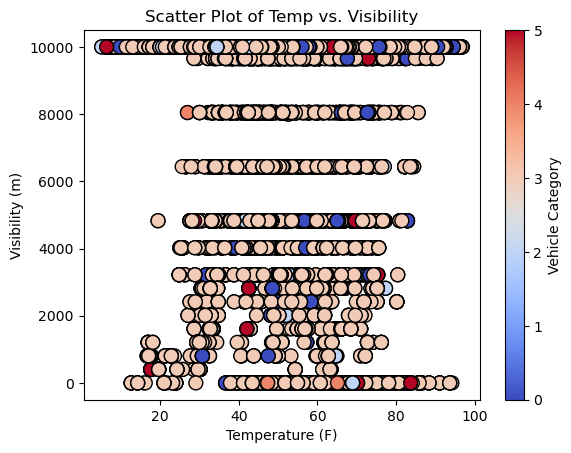

In [13]:
import matplotlib.pyplot as plt

X = merged_df[['temp', 'visibility']].values
y = merged_df['vehicle_category_encoded'].values  # Use encoded values

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="coolwarm", edgecolor="k")
plt.title("Scatter Plot of Temp vs. Visibility")
plt.xlabel("Temperature (F)")
plt.ylabel("Visibility (m)")
plt.colorbar(label="Vehicle Category")
plt.show()

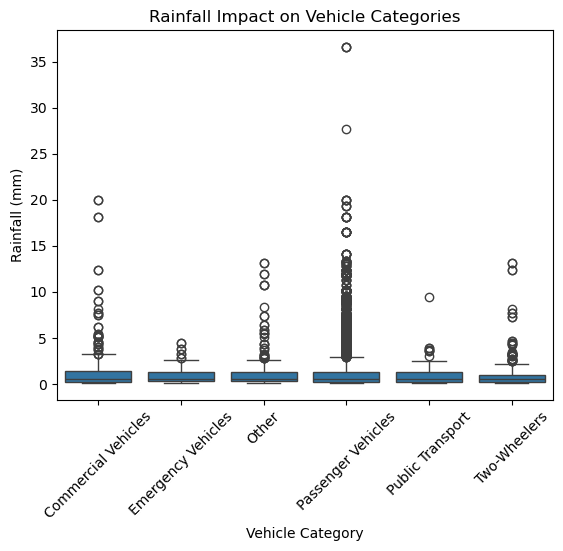

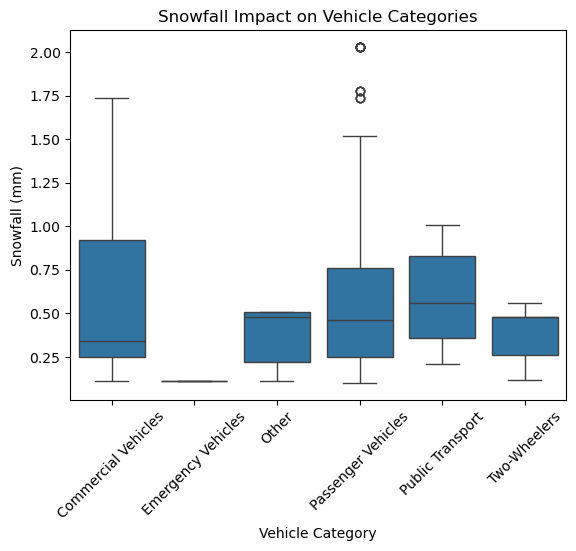

In [14]:
#By Weather Condition with Vehicle Cate
import seaborn as sns

# Create subsets of the data for rain and snow analysis
rain_data = merged_df[merged_df['rain_1h'] > 0]
snow_data = merged_df[merged_df['snow_1h'] > 0]

# Visualize number of crashes by vehicle category during rain
sns.boxplot(x='vehicle_category', y='rain_1h', data=rain_data)
plt.title("Rainfall Impact on Vehicle Categories")
plt.xlabel("Vehicle Category")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

# Visualize number of crashes by vehicle category during snow
sns.boxplot(x='vehicle_category', y='snow_1h', data=snow_data)
plt.title("Snowfall Impact on Vehicle Categories")
plt.xlabel("Vehicle Category")
plt.ylabel("Snowfall (mm)")
plt.xticks(rotation=45)
plt.show()

In [15]:
severity_analysis = merged_df.groupby('vehicle_category').agg({
    'number_of_persons_injured': ['mean', 'max'],
    'rain_1h': 'mean',
    'snow_1h': 'mean',
    'clouds_all': 'mean'
}).reset_index()


C:\Users\elifa\AppData\Local\Temp\ipykernel_15204\1791870896.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_analysis = merged_df.groupby('vehicle_category').agg({


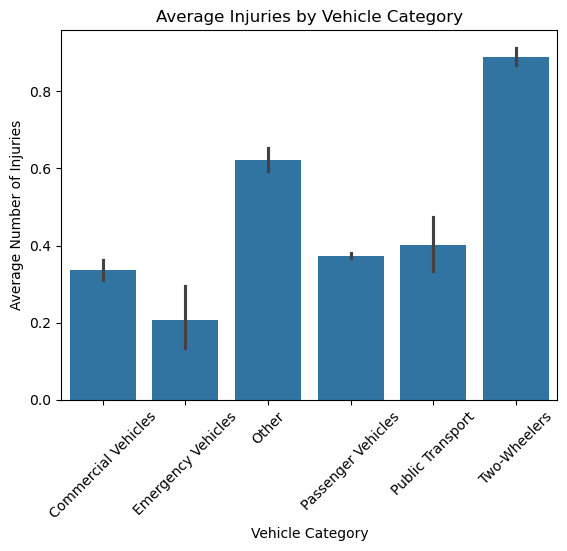

In [16]:
sns.barplot(x='vehicle_category', y='number_of_persons_injured', data=merged_df)
plt.title("Average Injuries by Vehicle Category")
plt.xlabel("Vehicle Category")
plt.ylabel("Average Number of Injuries")
plt.xticks(rotation=45)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Select features and target
features = ['temp', 'visibility', 'rain_1h', 'snow_1h', 'clouds_all']
X = merged_df[features]
y = merged_df['vehicle_category_encoded']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Calculate confusion matrix and metrics
cm = confusion_matrix(y_test, y_pred)

# Create confusion matrix DataFrame
unique_classes = np.unique(y_test)
cm_df = pd.DataFrame(
    cm, 
    index=[f"Actual {cls}" for cls in unique_classes],
    columns=[f"Predicted {cls}" for cls in unique_classes]
)

print("Confusion Matrix:")
print(cm_df)

# Additional Metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0           24            0            2          555            0   
Actual 1            1            1            0           51            0   
Actual 2            7            0            1          298            0   
Actual 3          127           10           60         8125           30   
Actual 4            1            0            0          118            2   
Actual 5            4            0            4          335            2   

          Predicted 5  
Actual 0           16  
Actual 1            2  
Actual 2            2  
Actual 3           93  
Actual 4            2  
Actual 5           11  

Accuracy Score: 0.8259813840550384

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.04      0.06       597
           1       0.09      0.02      0.03        55
           2       0.01      0.00      0.01       